Datu ielasīšana, priekšapstrāde un sākotnējā atspoguļošana
---

In [85]:
import csv          
import requests     
import numpy as np  
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [86]:
datu_kopa = pd.read_csv('wines.csv')
datu_kopa.head()

,class,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,0d280_0d315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Info par datu kopas kolonnu datu tipiem

In [87]:
datu_kopa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malicacid                     178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  0d280_0d315_of_diluted_wines  178 non-null    float64
 13  proli

In [88]:
print(datu_kopa.head(7))

   class  alcohol  malicacid   ash  alcalinity_of_ash  magnesium  \
0      1    14.23       1.71  2.43               15.6        127   
1      1    13.20       1.78  2.14               11.2        100   
2      1    13.16       2.36  2.67               18.6        101   
3      1    14.37       1.95  2.50               16.8        113   
4      1    13.24       2.59  2.87               21.0        118   
5      1    14.20       1.76  2.45               15.2        112   
6      1    14.39       1.87  2.45               14.6         96   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   
5           3.27        3.39 

### Kopsavilkuma statistika

In [89]:
datu_kopa.describe()

,class,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,0d280_0d315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Datu normalizācija

In [90]:
numeric_columns = datu_kopa.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns[numeric_columns != 'class']  # Exclude the 'class' column

for column in numeric_columns:
    datu_kopa[column] = (datu_kopa[column] - datu_kopa[column].min()) / (datu_kopa[column].max() - datu_kopa[column].min())

print(datu_kopa.head(10))
print(datu_kopa.describe())

   class   alcohol  malicacid       ash  alcalinity_of_ash  magnesium  \
0      1  0.842105   0.191700  0.572193           0.257732   0.619565   
1      1  0.571053   0.205534  0.417112           0.030928   0.326087   
2      1  0.560526   0.320158  0.700535           0.412371   0.336957   
3      1  0.878947   0.239130  0.609626           0.319588   0.467391   
4      1  0.581579   0.365613  0.807487           0.536082   0.521739   
5      1  0.834211   0.201581  0.582888           0.237113   0.456522   
6      1  0.884211   0.223320  0.582888           0.206186   0.282609   
7      1  0.797368   0.278656  0.668449           0.360825   0.554348   
8      1  1.000000   0.177866  0.433155           0.175258   0.293478   
9      1  0.744737   0.120553  0.486631           0.278351   0.304348   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283    

Datu un faktoru vērtību vizualizācija
---

### Vērtību attēlojums

<Axes: >

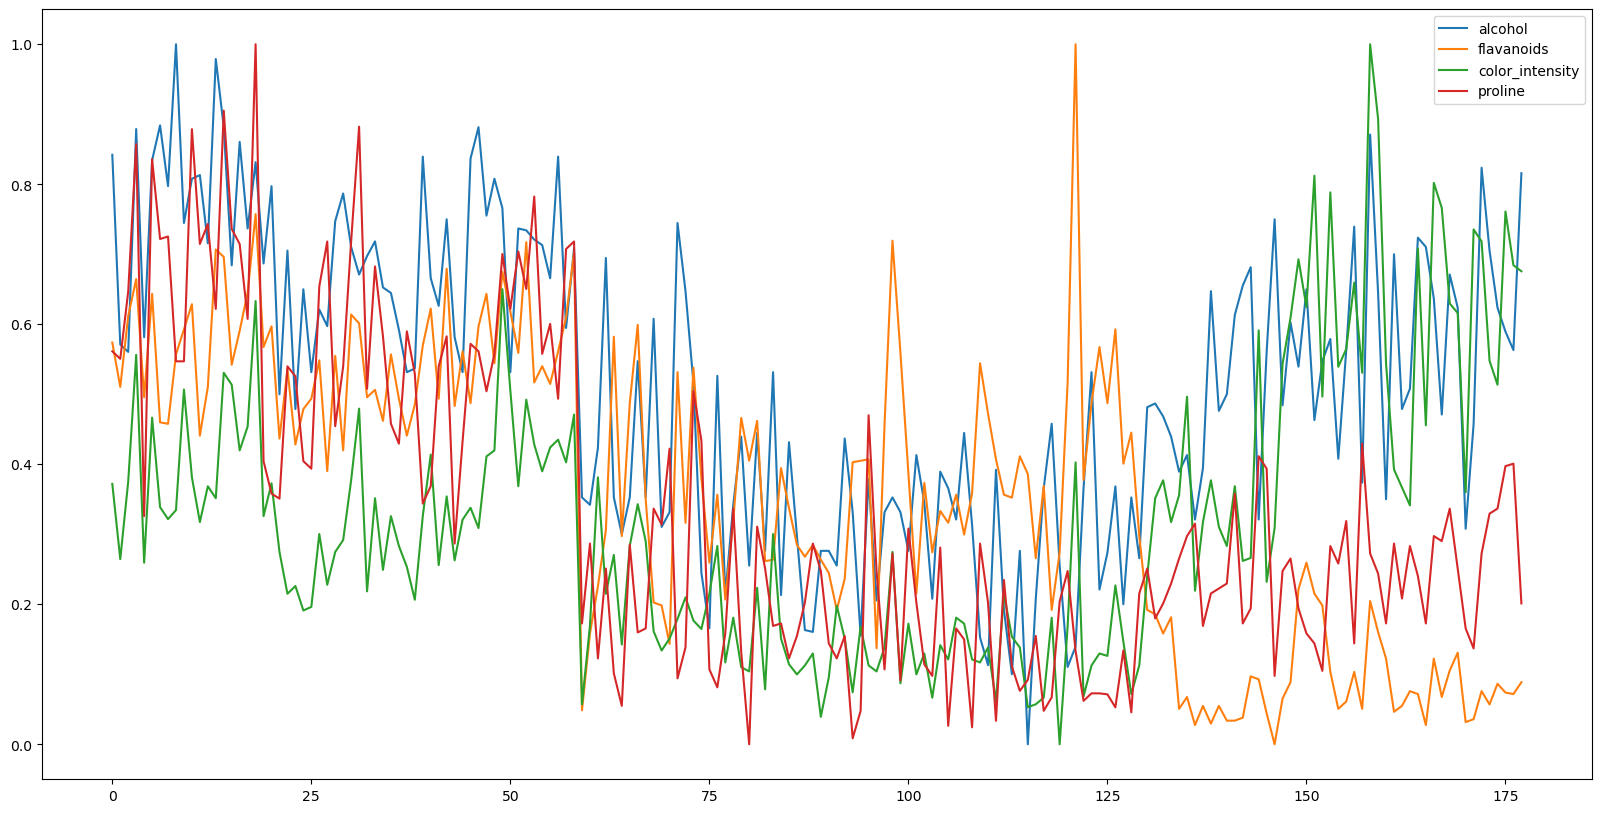

In [91]:
datu_kopa_vizualizacijai = datu_kopa[['alcohol', 'flavanoids', 'color_intensity', 'proline']]

datu_kopa_vizualizacijai.plot(figsize=(20,10))

### Histogrammas

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'flavanoids'}>],
       [<Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'proline'}>]], dtype=object)

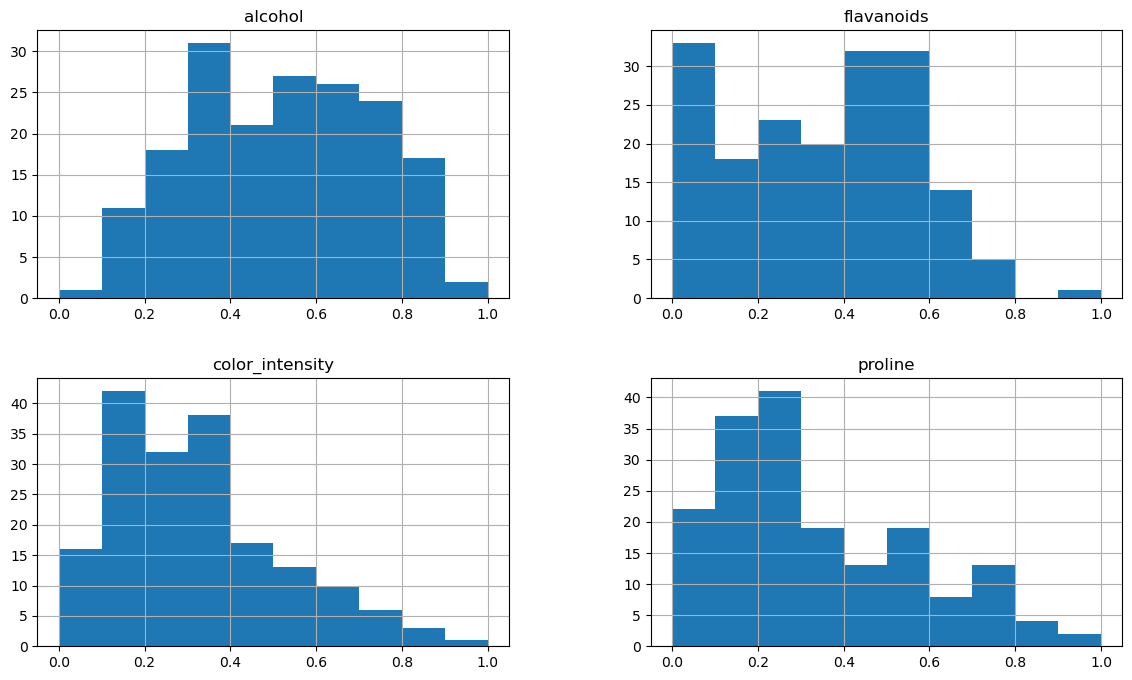

In [92]:
selected_vars = ['alcohol', 'flavanoids', 'color_intensity', 'proline']
datu_kopa[selected_vars].hist(figsize=(14,8))

### Izkliedes diagrammu analīze (Atribūtu savstarpējie sadalījumi)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

Text(0.5, 0.98, 'Faktoru savstarpējās attiecības')

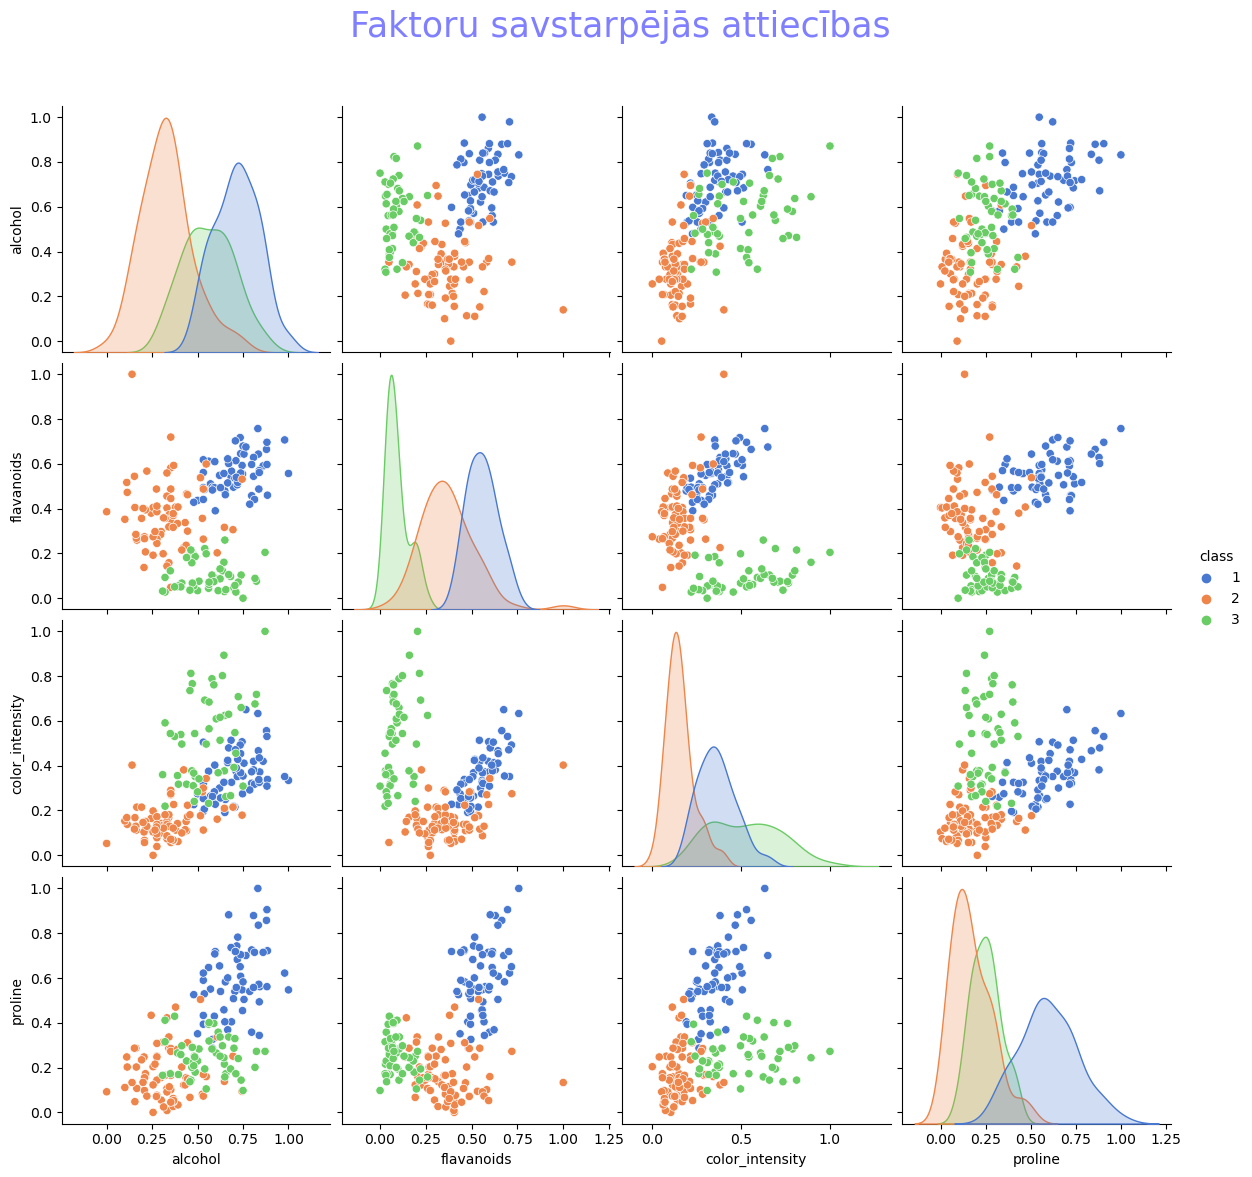

In [93]:
paru_grafiks = sns.pairplot(datu_kopa, 
                           hue='class',
                           palette="muted",
                           height=3,
                           vars=['alcohol', 'flavanoids', 'color_intensity', 'proline'],
                           kind='scatter')

plt.subplots_adjust(top=0.9)

paru_grafiks.fig.suptitle('Faktoru savstarpējās attiecības', fontsize=25, color='b', alpha=0.5)

### Atribūtu savstarpējā korelācija

<Axes: >

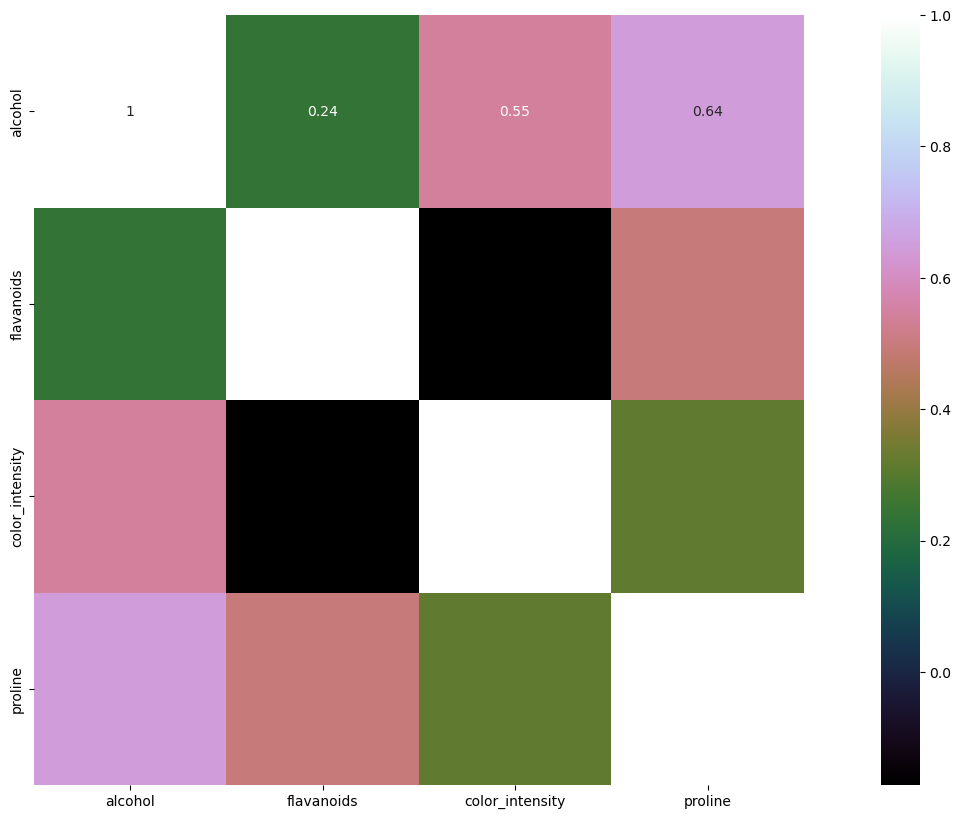

In [94]:
selected_vars = ['alcohol', 'flavanoids', 'color_intensity', 'proline']

korelacijas_matrica = datu_kopa[selected_vars].corr(method='pearson')

plt.figure(figsize=(20,10))
sns.heatmap(korelacijas_matrica, 
            vmax=1, 
            square=True, 
            annot=True, 
            cmap='cubehelix')

K-vidējo algoritms
---

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kme

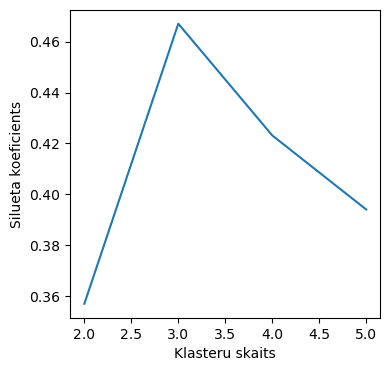

In [95]:
from sklearn.cluster import KMeans
from sklearn import metrics

darba_datu_kopa_klasterizacijai_3_pazimes = datu_kopa[['alcohol', 'flavanoids', 'color_intensity']]

Silueta_koeficients = []

for i in range(2,6):
    kmeans_modelis = KMeans(n_clusters = i, init = "k-means++")
    kmeans_modelis.fit(darba_datu_kopa_klasterizacijai_3_pazimes)
    Silueta_koeficients.append(metrics.silhouette_score(darba_datu_kopa_klasterizacijai_3_pazimes, kmeans_modelis.labels_))

plt.figure(figsize=(4,4))
plt.plot(range(2,6), Silueta_koeficients)
plt.xlabel('Klasteru skaits')
plt.ylabel('Silueta koeficients')
plt.show()

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


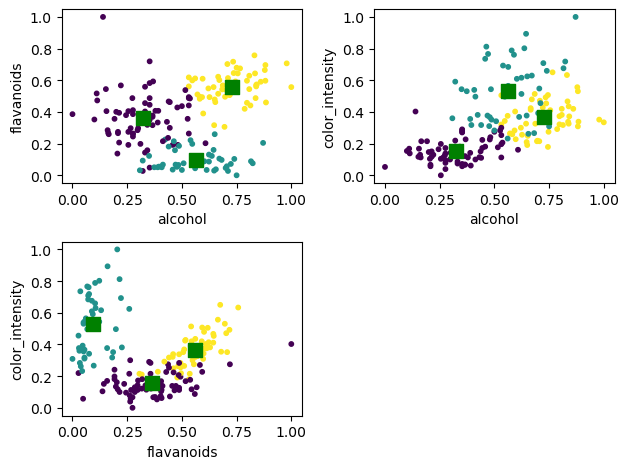

In [96]:
import matplotlib.pyplot as plt

kmeans_modelis = KMeans(n_clusters=3, init="k-means++").fit(darba_datu_kopa_klasterizacijai_3_pazimes)

centroids = kmeans_modelis.cluster_centers_

ypred = kmeans_modelis.predict(darba_datu_kopa_klasterizacijai_3_pazimes)

plt.subplot(2,2,1)  
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['alcohol'], 
           darba_datu_kopa_klasterizacijai_3_pazimes['flavanoids'], 
           s=10, c=ypred)
plt.scatter(centroids[0,0], centroids[0,1], s=100, c='g', marker='s')
plt.scatter(centroids[1,0], centroids[1,1], s=100, c='g', marker='s')
plt.scatter(centroids[2,0], centroids[2,1], s=100, c='g', marker='s')
plt.xlabel('alcohol')
plt.ylabel('flavanoids')

plt.subplot(2,2,2)  
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['alcohol'], 
           darba_datu_kopa_klasterizacijai_3_pazimes['color_intensity'], 
           s=10, c=ypred)
plt.scatter(centroids[0,0], centroids[0,2], s=100, c='g', marker='s')
plt.scatter(centroids[1,0], centroids[1,2], s=100, c='g', marker='s')
plt.scatter(centroids[2,0], centroids[2,2], s=100, c='g', marker='s')
plt.xlabel('alcohol')
plt.ylabel('color_intensity')

plt.subplot(2,2,3)  
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['flavanoids'], 
           darba_datu_kopa_klasterizacijai_3_pazimes['color_intensity'], 
           s=10, c=ypred)
plt.scatter(centroids[0,1], centroids[0,2], s=100, c='g', marker='s')
plt.scatter(centroids[1,1], centroids[1,2], s=100, c='g', marker='s')
plt.scatter(centroids[2,1], centroids[2,2], s=100, c='g', marker='s')
plt.xlabel('flavanoids')
plt.ylabel('color_intensity')

plt.tight_layout()
plt.show()

Hierarhiskā aglomeratīvā klasterēšana
---

In [97]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

linkage_matrix = shc.linkage(darba_datu_kopa_klasterizacijai_3_pazimes, method='ward')
def get_cut_height(linkage_matrix, n_clusters):
    distances = linkage_matrix[:, 2]
    return sorted(distances, reverse=True)[n_clusters - 1]


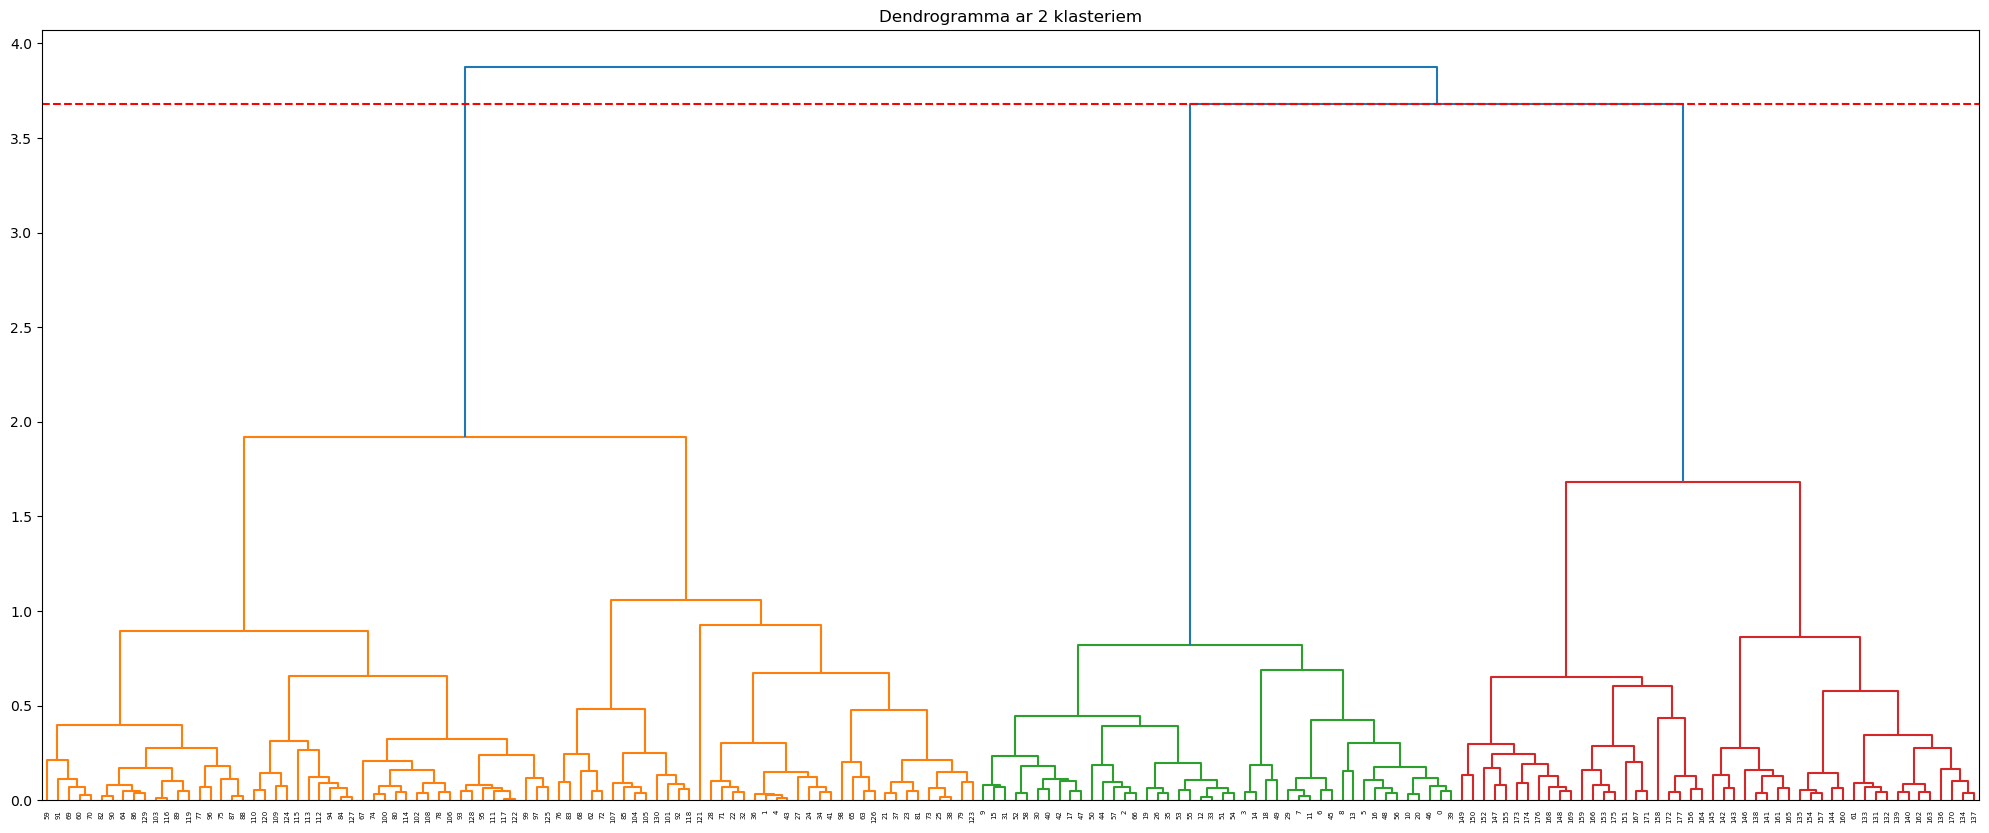

In [98]:
cut2 = get_cut_height(linkage_matrix, 2)
plt.figure(figsize=(25, 10))
plt.title("Dendrogramma ar 2 klasteriem")
shc.dendrogram(linkage_matrix)
plt.axhline(y=cut2, color='r', linestyle='--')
plt.show()

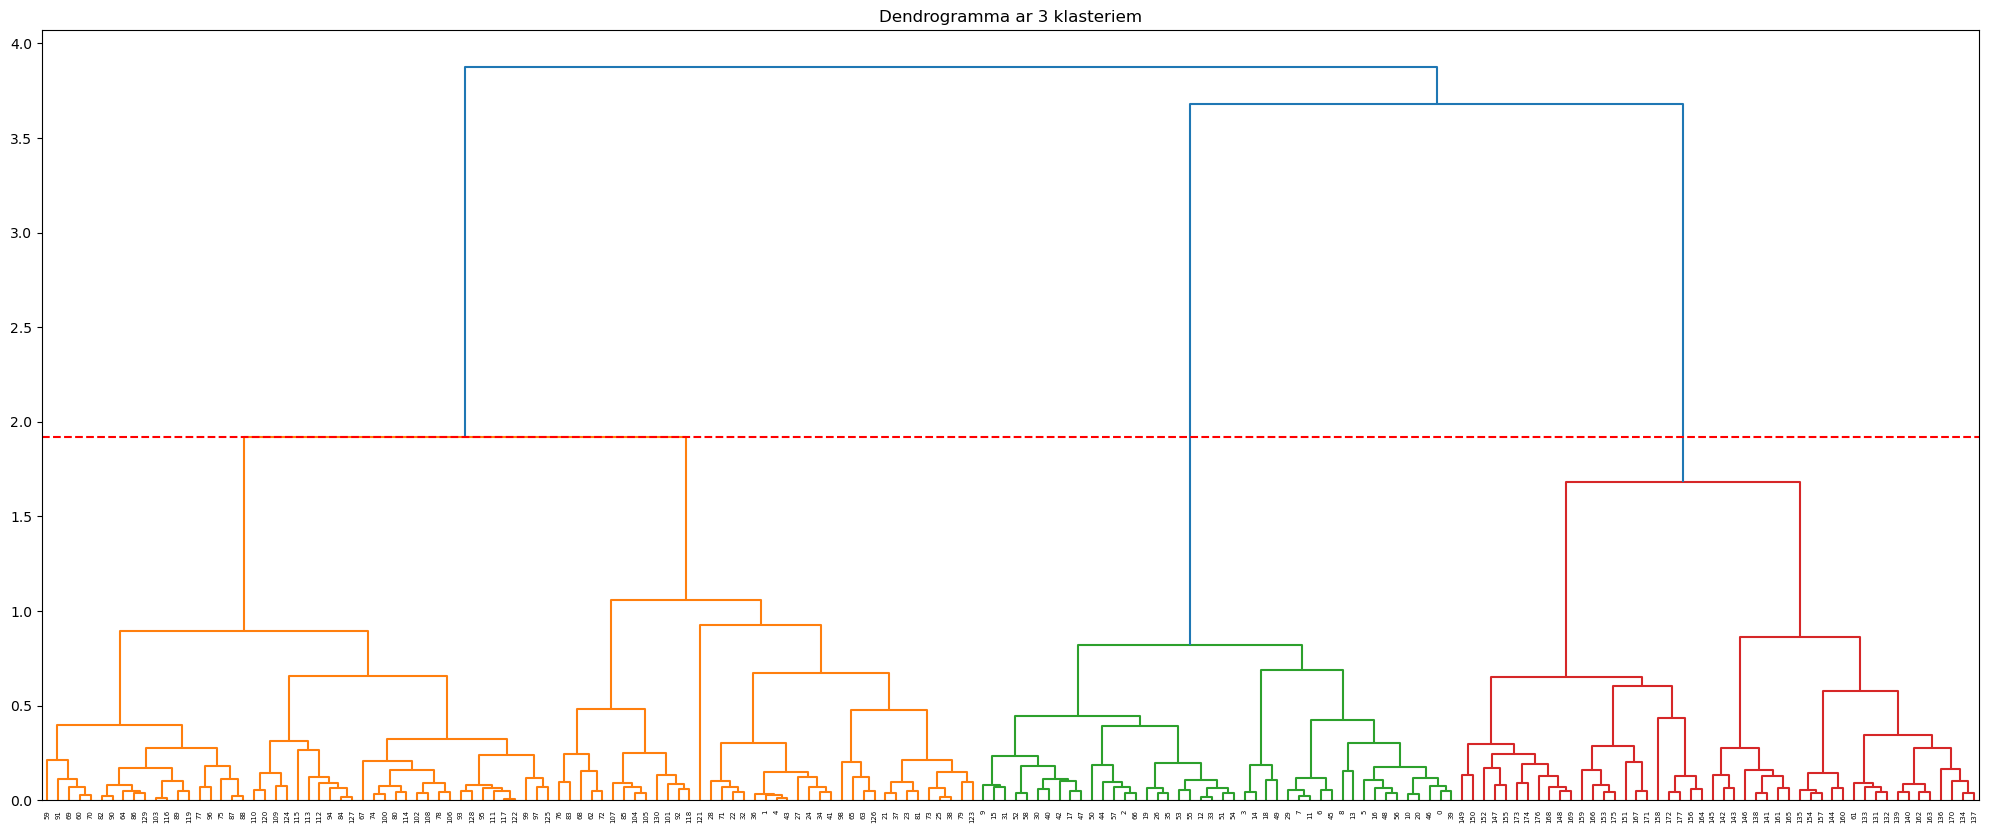

In [99]:
cut3 = get_cut_height(linkage_matrix, 3)
plt.figure(figsize=(25, 10))
plt.title("Dendrogramma ar 3 klasteriem")
shc.dendrogram(linkage_matrix)
plt.axhline(y=cut3, color='r', linestyle='--')
plt.show()

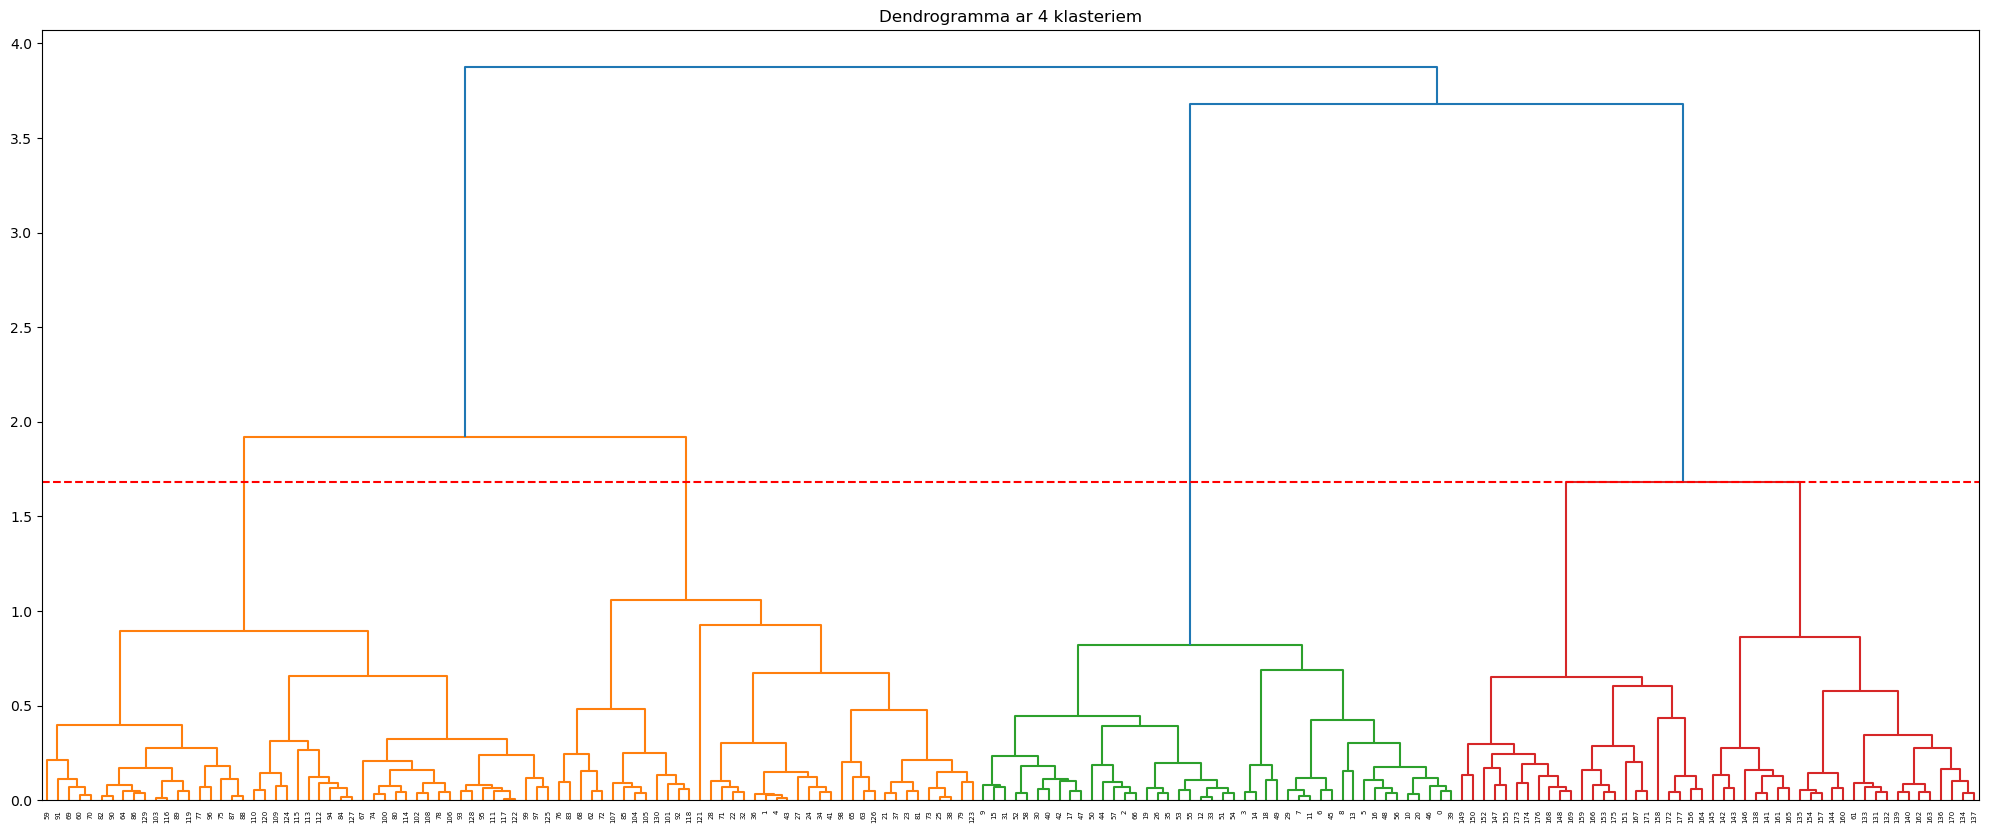

In [100]:
cut4 = get_cut_height(linkage_matrix, 4)
plt.figure(figsize=(25, 10))
plt.title("Dendrogramma ar 4 klasteriem")
shc.dendrogram(linkage_matrix)
plt.axhline(y=cut4, color='r', linestyle='--')
plt.show()

Pārraudzītā mašīnmācīšanās
---

### Mākslīgo neironu tīkli

In [101]:
from sklearn.model_selection import train_test_split

izejas = datu_kopa['class']

apmacibas_datu_proporcija = 0.7

X_apmacibas, X_testa, y_apmacibas, y_testa = train_test_split(
    darba_datu_kopa_klasterizacijai_3_pazimes,
    izejas,
    test_size=1.0 - apmacibas_datu_proporcija,
    random_state=42
)

#### **1.modelis** - 2 slāņi ar 100 neironiem katrā

In [102]:
from sklearn.neural_network import MLPClassifier

neironu_tikla_modelis = MLPClassifier(
    hidden_layer_sizes=(100,100),
    max_iter=1000,
    activation='logistic',
    solver='sgd',
    learning_rate_init=0.1,
    verbose=1
)

neironu_tikla_modelis.fit(X_apmacibas, y_apmacibas)

Iteration 1, loss = 1.09797078
Iteration 2, loss = 1.09401852
Iteration 3, loss = 1.08610075
Iteration 4, loss = 1.08598676
Iteration 5, loss = 1.08595126
Iteration 6, loss = 1.08590891
Iteration 7, loss = 1.08586414
Iteration 8, loss = 1.08581540
Iteration 9, loss = 1.08576292
Iteration 10, loss = 1.08570712
Iteration 11, loss = 1.08564828
Iteration 12, loss = 1.08558670
Iteration 13, loss = 1.08552263
Iteration 14, loss = 1.08545630
Iteration 15, loss = 1.08538790
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              learning_rate_init=0.1, max_iter=1000, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.39      1.00      0.56        21
           3       0.00      0.00      0.00        14

    accuracy                           0.39        54
   macro avg       0.13      0.33      0.19        54
weighted avg       0.15      0.39      0.22        54



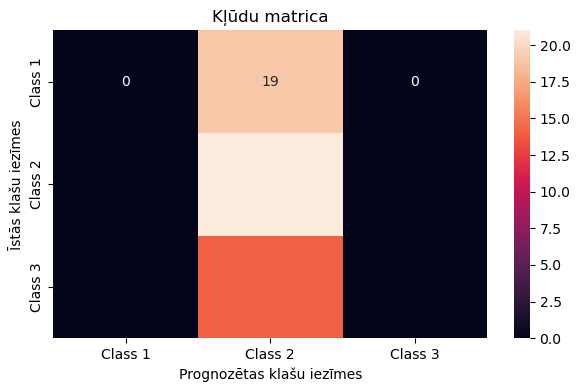

In [103]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pltb

y_prognoze = neironu_tikla_modelis.predict(X_testa)

print(classification_report(y_testa, y_prognoze, zero_division=0))

kludu_matrica = confusion_matrix(y_testa, y_prognoze)

fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Prognozētas klašu iezīmes')
ax.set_ylabel('Īstās klašu iezīmes')
ax.set_title('Kļūdu matrica')

ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])

plt.show()

#### **2.modelis** - divi slāņi ar 20 un 10 neironiem

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Experiment with modified hyperparameters:
              precision    recall  f1-score   support

           1       0.86      1.00      0.93        19
           2       1.00      0.86      0.92        21
           3       1.00      1.00      1.00        14

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



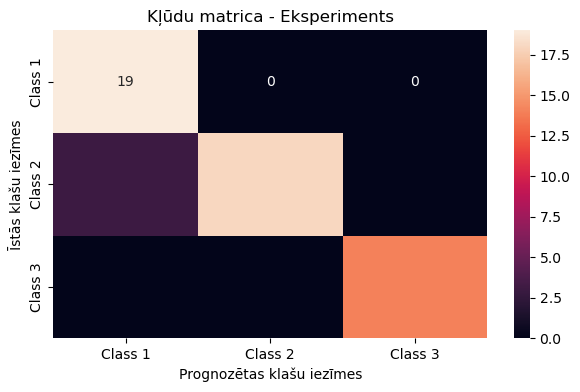

In [104]:
neironu_tikla_modelis_eksperiments = MLPClassifier(
    hidden_layer_sizes=(20, 10),
    max_iter=200,         
    activation='relu',     
    solver='adam',             
    learning_rate_init=0.01,   
    alpha=0.0001,         
    verbose=0
)

neironu_tikla_modelis_eksperiments.fit(X_apmacibas, y_apmacibas)

y_prognoze_eksperiments = neironu_tikla_modelis_eksperiments.predict(X_testa)
print("Experiment with modified hyperparameters:")
print(classification_report(y_testa, y_prognoze_eksperiments, zero_division=0))

kludu_matrica = confusion_matrix(y_testa, y_prognoze_eksperiments)

fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Prognozētas klašu iezīmes')
ax.set_ylabel('Īstās klašu iezīmes')
ax.set_title('Kļūdu matrica - Eksperiments')
ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])

plt.show()

#### **3.modelis** - viens slānis ar 5 neironiem 

In [105]:
neironu_tikla_modelis_1_slanis = MLPClassifier(
    hidden_layer_sizes=(5),
    max_iter=50,        
    activation='logistic',
    solver='sgd',     
    learning_rate_init=0.2,
    verbose=0
)

# Train the model using the training data
neironu_tikla_modelis_1_slanis.fit(X_apmacibas, y_apmacibas)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=5,
              learning_rate_init=0.2, max_iter=50, solver='sgd', verbose=0)

              precision    recall  f1-score   support

           1       1.00      0.68      0.81        19
           2       0.57      1.00      0.72        21
           3       1.00      0.29      0.44        14

    accuracy                           0.70        54
   macro avg       0.86      0.66      0.66        54
weighted avg       0.83      0.70      0.68        54



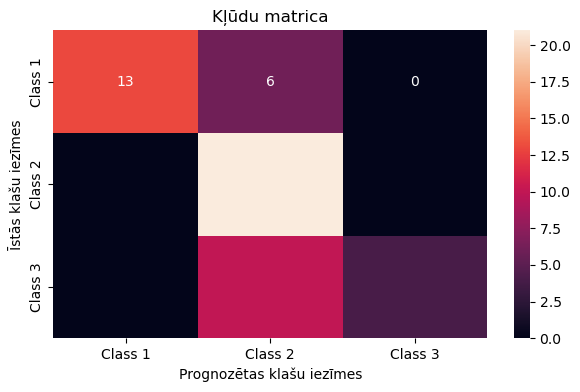

In [106]:
y_prognoze_1_slanis = neironu_tikla_modelis_1_slanis.predict(X_testa)

print(classification_report(y_testa, y_prognoze_1_slanis, zero_division=0))

kludu_matrica = confusion_matrix(y_testa, y_prognoze_1_slanis)

fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Prognozētas klašu iezīmes')
ax.set_ylabel('Īstās klašu iezīmes')
ax.set_title('Kļūdu matrica')

ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])

plt.show()

In [107]:
print("\nRezultāti:")
print(f"1. Modelis (100,100 neironi, divi slāņi): {neironu_tikla_modelis.score(X_testa, y_testa):.4f}")
print(f"2. Modelis (20,10 neironi, divi slāņi): {neironu_tikla_modelis_eksperiments.score(X_testa, y_testa):.4f}")
print(f"3. Modelis (5 neironi, viens slānis): {neironu_tikla_modelis_1_slanis.score(X_testa, y_testa):.4f}")


Rezultāti:
1. Modelis (100,100 neironi, divi slāņi): 0.3889
2. Modelis (20,10 neironi, divi slāņi): 0.9444
3. Modelis (5 neironi, viens slānis): 0.7037


### kNN algoritms

Parasts kNN ar 5 kaimiņiem

Experiment 1: Basic KNN with 5 neighbors
              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



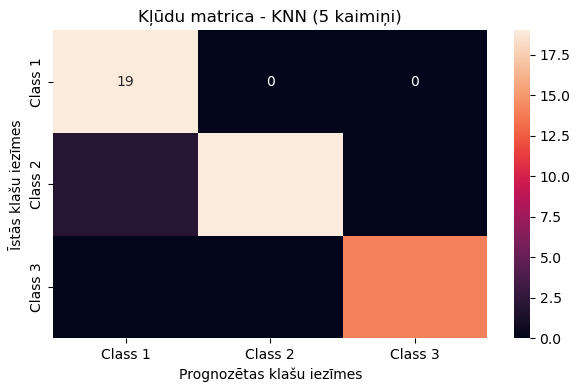

In [108]:
from sklearn.neighbors import KNeighborsClassifier

KNN_MODEL_1 = KNeighborsClassifier(n_neighbors=5)
KNN_MODEL_1.fit(X_apmacibas, y_apmacibas)
y_prognoze_knn_1 = KNN_MODEL_1.predict(X_testa)

print("Experiment 1: Basic KNN with 5 neighbors")
print(classification_report(y_testa, y_prognoze_knn_1, zero_division=0))
kludu_matrica_1 = confusion_matrix(y_testa, y_prognoze_knn_1)
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica_1, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Prognozētas klašu iezīmes')
ax.set_ylabel('Īstās klašu iezīmes')
ax.set_title('Kļūdu matrica - KNN (5 kaimiņi)')
ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])
plt.show()

kNN ar "weights=distance" un 3 kaimiņiem


Eksperiments Nr. 2: KNN ar 3 kaimiņiem un "weights=distance"
              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



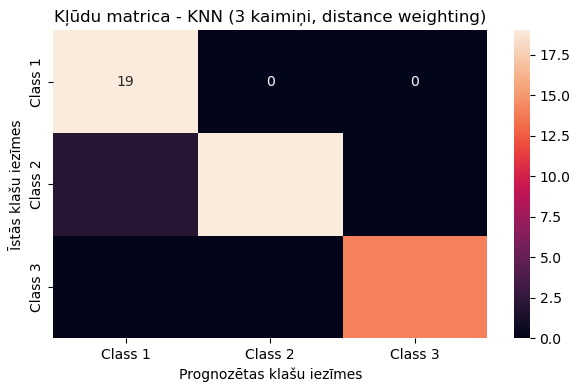

In [109]:
KNN_MODEL_2 = KNeighborsClassifier(n_neighbors=3, weights='distance')
KNN_MODEL_2.fit(X_apmacibas, y_apmacibas)
y_prognoze_knn_2 = KNN_MODEL_2.predict(X_testa)

print("\nEksperiments Nr. 2: KNN ar 3 kaimiņiem un \"weights=distance\"")
print(classification_report(y_testa, y_prognoze_knn_2, zero_division=0))
kludu_matrica_2 = confusion_matrix(y_testa, y_prognoze_knn_2)
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica_2, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Prognozētas klašu iezīmes')
ax.set_ylabel('Īstās klašu iezīmes')
ax.set_title('Kļūdu matrica - KNN (3 kaimiņi, distance weighting)')
ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])
plt.show()

Eksperiments Nr. 3: kNN ar 7 kaimiņiem un Manhetenas attālumu


Eksperiments Nr. 3: kNN ar 7 kaimiņiem un Manhetenas attālumu
              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



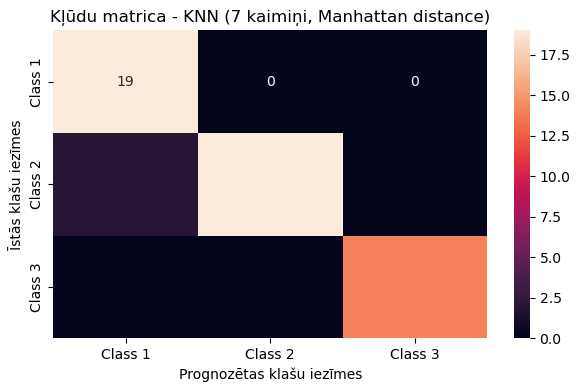

In [110]:
KNN_MODEL_3 = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
KNN_MODEL_3.fit(X_apmacibas, y_apmacibas)
y_prognoze_knn_3 = KNN_MODEL_3.predict(X_testa)

print("\nEksperiments Nr. 3: kNN ar 7 kaimiņiem un Manhetenas attālumu")
print(classification_report(y_testa, y_prognoze_knn_3, zero_division=0))
kludu_matrica_3 = confusion_matrix(y_testa, y_prognoze_knn_3)
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica_3, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Prognozētas klašu iezīmes')
ax.set_ylabel('Īstās klašu iezīmes')
ax.set_title('Kļūdu matrica - KNN (7 kaimiņi, Manhattan distance)')
ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])
plt.show()

In [111]:
print("\nPrecizitātes salīdzinājums:")
print(f"Experiment 1 (n=5): {KNN_MODEL_1.score(X_testa, y_testa):.4f}")
print(f"Experiment 2 (n=3, weighted): {KNN_MODEL_2.score(X_testa, y_testa):.4f}")
print(f"Experiment 3 (n=7, manhattan): {KNN_MODEL_3.score(X_testa, y_testa):.4f}")


Precizitātes salīdzinājums:
Experiment 1 (n=5): 0.9630
Experiment 2 (n=3, weighted): 0.9630
Experiment 3 (n=7, manhattan): 0.9630


### Random  Forest

Eksperiments Nr. 1: Parasts Random Forest
              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.95      0.90      0.93        21
           3       1.00      1.00      1.00        14

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



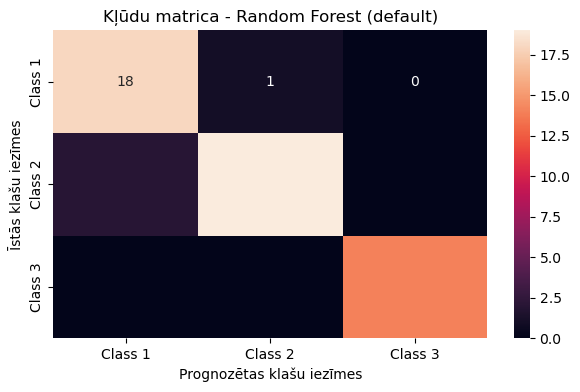

In [112]:
from sklearn.ensemble import RandomForestClassifier

RF_MODEL_1 = RandomForestClassifier(random_state=42)
RF_MODEL_1.fit(X_apmacibas, y_apmacibas)
y_prognoze_rf_1 = RF_MODEL_1.predict(X_testa)

print("Eksperiments Nr. 1: Parasts Random Forest")
print(classification_report(y_testa, y_prognoze_rf_1, zero_division=0))
kludu_matrica_1 = confusion_matrix(y_testa, y_prognoze_rf_1)
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica_1, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Prognozētas klašu iezīmes')
ax.set_ylabel('Īstās klašu iezīmes')
ax.set_title('Kļūdu matrica - Random Forest (default)')
ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])
plt.show()


Experiment 2: Random Forest ar mazāk, bet dziļākiem kokiem
              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.95      0.90      0.93        21
           3       1.00      1.00      1.00        14

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



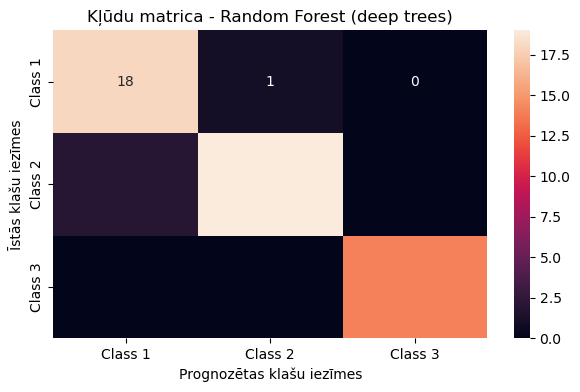

In [113]:
RF_MODEL_2 = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=2, random_state=42)
RF_MODEL_2.fit(X_apmacibas, y_apmacibas)
y_prognoze_rf_2 = RF_MODEL_2.predict(X_testa)

print("\nExperiment 2: Random Forest ar mazāk, bet dziļākiem kokiem")
print(classification_report(y_testa, y_prognoze_rf_2, zero_division=0))
kludu_matrica_2 = confusion_matrix(y_testa, y_prognoze_rf_2)
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica_2, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Prognozētas klašu iezīmes')
ax.set_ylabel('Īstās klašu iezīmes')
ax.set_title('Kļūdu matrica - Random Forest (deep trees)')
ax.xaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])
ax.yaxis.set_ticklabels(['Class 1', 'Class 2', 'Class 3'])
plt.show()


Eksperiments 3: Random Forest (sekli, daudzi)
              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.95      0.90      0.93        21
           3       1.00      1.00      1.00        14

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



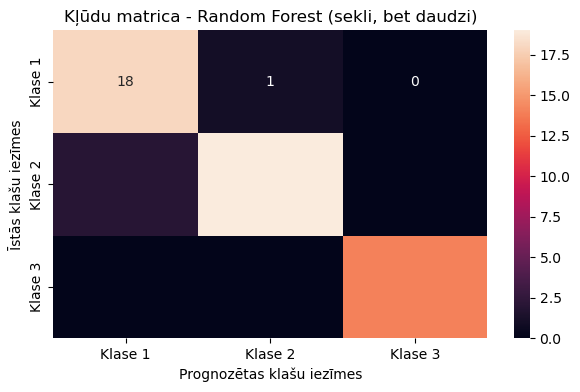

In [114]:
RF_MODEL_3 = RandomForestClassifier(n_estimators=200, max_depth=5, criterion='entropy', random_state=42)
RF_MODEL_3.fit(X_apmacibas, y_apmacibas)
y_prognoze_rf_3 = RF_MODEL_3.predict(X_testa)

print("\nEksperiments 3: Random Forest (sekli, daudzi)")
print(classification_report(y_testa, y_prognoze_rf_3, zero_division=0))
kludu_matrica_3 = confusion_matrix(y_testa, y_prognoze_rf_3)
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(kludu_matrica_3, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Prognozētas klašu iezīmes')
ax.set_ylabel('Īstās klašu iezīmes')
ax.set_title('Kļūdu matrica - Random Forest (sekli, bet daudzi)')
ax.xaxis.set_ticklabels(['Klase 1', 'Klase 2', 'Klase 3'])
ax.yaxis.set_ticklabels(['Klase 1', 'Klase 2', 'Klase 3'])
plt.show()

In [115]:
print("\nRandom Forest Precizitātes salīdzinājums:")
print(f"Eksperiments 1 (noklusējums): {RF_MODEL_1.score(X_testa, y_testa):.4f}")
print(f"Eksperiments 2 (dziļāki koki): {RF_MODEL_2.score(X_testa, y_testa):.4f}")
print(f"Eksperiments 3 (vairāk koku, ierobežots dziļums): {RF_MODEL_3.score(X_testa, y_testa):.4f}")


Random Forest Precizitātes salīdzinājums:
Eksperiments 1 (noklusējums): 0.9444
Eksperiments 2 (dziļāki koki): 0.9444
Eksperiments 3 (vairāk koku, ierobežots dziļums): 0.9444
